In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# ‚úÖ API Key
api_key = "-"

# ‚úÖ Ïû¨ÏãúÎèÑ Í∞ÄÎä•Ìïú ÏÑ∏ÏÖò Íµ¨ÏÑ±
session = requests.Session()
retries = Retry(total=3, backoff_factor=1, status_forcelist=[500, 502, 503, 504])
session.mount("http://", HTTPAdapter(max_retries=retries))

# ‚úÖ Spot Ï†ïÎ≥¥ ÏàòÏßë
spot_url = f"http://openapi.seoul.go.kr:8088/{api_key}/xml/SpotInfo/1/1000/"
res = session.get(spot_url, timeout=10)
root = ET.fromstring(res.content)

spot_list = []
for row in root.findall("row"):
    spot_list.append({
        "spot_num": row.find("spot_num").text,
        "spot_name": row.find("spot_nm").text,
        "x": float(row.find("grs80tm_x").text),
        "y": float(row.find("grs80tm_y").text),
    })

spot_df = pd.DataFrame(spot_list)

# ‚úÖ ÎÇ†Ïßú / ÏãúÍ∞Ñ ÏÑ§Ï†ï: 2025ÎÖÑ 5Ïõî ÌèâÏùº
def get_weekdays(year, month):
    weekdays = []
    date = datetime(year, month, 1)
    while date.month == month:
        if date.weekday() < 5:  # Ïõî~Í∏à
            weekdays.append(date.strftime("%Y%m%d"))
        date += timedelta(days=1)
    return weekdays

dates = get_weekdays(2025, 5)
hours = [f"{i:02d}" for i in range(24)]

# ‚úÖ ÍµêÌÜµÎüâ ÏàòÏßë
vol_records = []
fail_logs = []

for date in dates:
    for hour in hours:
        for spot in spot_df["spot_num"]:
            url = f"http://openapi.seoul.go.kr:8088/{api_key}/xml/VolInfo/1/100/{spot}/{date}/{hour}/"
            try:
                r = session.get(url, timeout=10)
                root = ET.fromstring(r.content)

                for row in root.findall("row"):
                    vol_records.append({
                        "spot_num": row.find("spot_num").text,
                        "date": row.find("ymd").text,
                        "hour": row.find("hh").text,
                        "inout": row.find("io_type").text,
                        "lane": row.find("lane_num").text,
                        "volume": int(row.find("vol").text)
                    })
            except Exception as e:
                print(f"‚ùå ÏöîÏ≤≠ Ïã§Ìå®: {date} {hour} {spot} - {e}")
                fail_logs.append((date, hour, spot))

# ‚úÖ Í≤∞Í≥º Ï†ïÎ¶¨
vol_df = pd.DataFrame(vol_records)
print(f"‚úÖ ÏàòÏßë ÏôÑÎ£å: {len(vol_df)}Í±¥")
if fail_logs:
    print(f"‚ö†Ô∏è Ïã§Ìå® ÏöîÏ≤≠ Ïàò: {len(fail_logs)}")
    pd.DataFrame(fail_logs, columns=["date", "hour", "spot"]).to_csv("Ï£ºÎßê_ÏöîÏ≤≠Ïã§Ìå®.csv", index=False)

vol_df.to_csv("4_weekday.csv", index=False, encoding="utf-8-sig")


‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-07 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-08 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-09 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-10 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-11 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-12 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-13 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-14 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-15 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-16 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-17 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-18 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-19 - no element found: line 1, column 0
‚ùå ÏöîÏ≤≠ Ïã§Ìå®: 20250514 04 C-20 - no element fo

In [138]:
import pandas as pd

vol_df= pd.read_csv("4_weekday.csv")
vol_df

spot_num      date  hour  inout  lane  volume
0          A-01  20250501     0      1     1     198
1          A-01  20250501     0      1     2     309
2          A-01  20250501     0      2     1     490
3          A-01  20250501     0      2     2     328
4          A-02  20250501     0      1     1     169
...         ...       ...   ...    ...   ...     ...
456898     F-09  20250530    23      2     2     239
456899     F-10  20250530    23      1     1     278
456900     F-10  20250530    23      1     2     236
456901     F-10  20250530    23      2     1     834
456902     F-10  20250530    23      2     2     815

[456903 rows x 6 columns]

In [139]:
import pandas as pd
spot_df= pd.read_csv("spot_with_address.csv")

In [165]:
spot_df

spot_num    spot_name              x              y         lon  \
0       A-01    ÏÑ±ÏÇ∞Î°ú(Í∏àÌôîÌÑ∞ÎÑê)  195489.000000  452136.000000  126.946835   
1       A-02    ÏÇ¨ÏßÅÎ°ú(ÏÇ¨ÏßÅÌÑ∞ÎÑê)  196756.776106  452546.638644  126.961184   
2       A-03  ÏûêÌïòÎ¨∏Î°ú(ÏûêÌïòÎ¨∏ÌÑ∞ÎÑê)  197216.855046  454350.990432  126.966385   
3       A-04   ÎåÄÏÇ¨Í¥ÄÎ°ú(ÏÇºÏ≤≠ÌÑ∞ÎÑê)  198648.893154  455200.108465  126.982598   
4       A-05     Ïú®Í≥°Î°ú(ÏïàÍµ≠Ïó≠)  198645.671347  452937.216603  126.982566   
..       ...          ...            ...            ...         ...   
130     F-02         Í∞ïÎ≥ÄÎ∂ÅÎ°ú  197729.000000  446395.000000  126.972209   
131     F-03        ÎÇ¥Î∂ÄÏàúÌôòÎ°ú  199911.000000  456580.000000  126.996889   
136     F-08  Í∞ïÎÇ®ÏàúÌôòÎ°ú(Í¥ÄÏïÖÌÑ∞ÎÑê)  191832.000000  437667.000000  126.905601   
137     F-09     ÏÑúÎ∂ÄÍ∞ÑÏÑ†ÏßÄÌïòÎèÑÎ°ú  189706.000000  441044.000000  126.881529   
138     F-10     Ïã†ÏõîÏó¨ÏùòÏßÄÌïòÎèÑÎ°ú  187350.000000  447719.000000  126.854781   

           lat     Íµ¨    Îèô   ÏßÄÏó≠  
0    37.571502  ÏÑúÎåÄÎ¨∏Íµ¨  Î¥âÏõêÎèô  Î∂ÅÏÑúÎ∂Ä  
1    37.575207   Ï¢ÖÎ°úÍµ¨  Î¨¥ÏïÖÎèô  Î∂ÅÏÑúÎ∂Ä  
2    37.591465   Ï¢ÖÎ°úÍµ¨  Ï≤≠Ïö¥Îèô  Î∂ÅÏÑúÎ∂Ä  
3    37.599119   ÏÑ±Î∂ÅÍµ¨  ÏÑ±Î∂ÅÎèô  Î∂ÅÏÑúÎ∂Ä  
4    37.578731   Ï¢ÖÎ°úÍµ¨  ÏïàÍµ≠Îèô  Î∂ÅÏÑúÎ∂Ä  
..         ...   ...  ...  ...  
130  37.519784   Ïö©ÏÇ∞Íµ¨  Ïù¥Ï¥åÎèô  ÎÇ®ÏÑúÎ∂Ä  
131  37.611553   ÏÑ±Î∂ÅÍµ¨  Ï†ïÎ¶âÎèô  Î∂ÅÏÑúÎ∂Ä  
136  37.441111   Í∏àÏ≤úÍµ¨  ÏãúÌù•Îèô  ÎÇ®ÏÑúÎ∂Ä  
137  37.471517   Í∏àÏ≤úÍµ¨  Í∞ÄÏÇ∞Îèô  ÎÇ®ÏÑúÎ∂Ä  
138  37.531629   Í∞ïÏÑúÍµ¨  ÌôîÍ≥°Îèô  ÎÇ®ÏÑúÎ∂Ä  

[81 rows x 9 columns]

In [140]:
import pandas as pd

# ‚úÖ Î≥ëÌï©
merged_df = pd.merge(vol_df, spot_df, on="spot_num", how="left")

# ‚úÖ ÌïÑÏöîÌïú Ïó¥ ÏÑ†ÌÉù Î∞è Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (ÏÑ†Ï†úÏ†Å Ï†ïÎ¶¨)
# merged_df = merged_df[["spot_num", "spot_name", "date", "hour", "inout", "volume", "Íµ¨", "Îèô", "ÏßÄÏó≠"]]
# merged_df.dropna(subset=["ÏßÄÏó≠", "volume"], inplace=True)

# ‚úÖ ÏßÄÏó≠Î≥Ñ ÌòºÏû°ÎèÑ ÏßëÍ≥Ñ (Ïú†ÏûÖ, Ïú†Ï∂ú Îî∞Î°ú)
region_gb = (
    merged_df.groupby(["date", "hour","Íµ¨", "Îèô", "ÏßÄÏó≠",  "spot_name", "inout"])[["volume", "x", "y"]]
    .sum()
    .reset_index()
    .rename(columns={"volume": "Ï¥ùÍµêÌÜµÎüâ"})
)

# ‚úÖ Ïú†ÏûÖ/Ïú†Ï∂ú Ìï¥ÏÑù Ïù¥Î¶Ñ Î∂ôÏù¥Í∏∞
region_gb["Íµ¨Î∂Ñ"] = region_gb["inout"].map({1: "Ïú†ÏûÖ", 2: "Ïú†Ï∂ú"})

# ‚úÖ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï†ïÎ†¨
region_gb = region_gb.sort_values(by=["date", "hour", "ÏßÄÏó≠", "Íµ¨Î∂Ñ"])

# ‚úÖ ÏòàÏãú Ï†ÄÏû•
# region_gb.to_csv("ÏßÄÏó≠Î≥Ñ_ÏãúÍ∞ÑÎ≥Ñ_ÍµêÌÜµÎüâ.csv", index=False, encoding="utf-8-sig")
# print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÏßÄÏó≠Î≥Ñ_ÏãúÍ∞ÑÎ≥Ñ_ÍµêÌÜµÎüâ.csv")
region_gb

date  hour    Íµ¨      Îèô   ÏßÄÏó≠     spot_name  inout  Ï¥ùÍµêÌÜµÎüâ  \
0       20250501     0  Í∞ïÎÇ®Íµ¨    ÏÇºÏÑ±Îèô  ÎÇ®ÎèôÎ∂Ä     ÌÖåÌó§ÎûÄÎ°ú(ÏÑ†Î¶âÏó≠)      1   958   
2       20250501     0  Í∞ïÎÇ®Íµ¨    ÏÑ∏Í≥°Îèô  ÎÇ®ÎèôÎ∂Ä  Î∞§Í≥†Í∞úÎ°ú(ÏÑ∏Í≥°ÎèôÏÇ¨Í±∞Î¶¨)      1   218   
4       20250501     0  Í∞ïÎÇ®Íµ¨    ÏÑ∏Í≥°Îèô  ÎÇ®ÎèôÎ∂Ä   ÌóåÎ¶âÎ°ú(ÏÑ∏Í≥°ÎèôÏÇ¨Í±∞Î¶¨)      1   350   
5       20250501     0  Í∞ïÎÇ®Íµ¨    Ïó≠ÏÇºÎèô  ÎÇ®ÎèôÎ∂Ä     Ïñ∏Ï£ºÎ°ú(Îß§Î¥âÌÑ∞ÎÑê)      1   577   
9       20250501     0  Í∞ïÎèôÍµ¨    Ï≤úÌò∏Îèô  ÎÇ®ÎèôÎ∂Ä           Í¥ëÏßÑÍµê      1   124   
...          ...   ...  ...    ...  ...           ...    ...   ...   
138900  20250530    23   Ï§ëÍµ¨  Î¥âÎûòÎèô1Í∞Ä  Î∂ÅÏÑúÎ∂Ä      ÏÜåÏõîÎ°ú(ÌöåÌòÑÏó≠)      2    37   
138902  20250530    23   Ï§ëÍµ¨    ÏàúÌôîÎèô  Î∂ÅÏÑúÎ∂Ä     ÏÑ∏Ï¢ÖÎåÄÎ°ú(ÏÑúÏö∏Ïó≠)      2   921   
138904  20250530    23   Ï§ëÍµ¨    ÏàúÌôîÎèô  Î∂ÅÏÑúÎ∂Ä      Ïπ†Ìå®Î°ú(Ïà≠Î°ÄÎ¨∏)      2   669   
138912  20250530    23   Ï§ëÍµ¨     Ï†ïÎèô  Î∂ÅÏÑúÎ∂Ä     ÏÑúÏÜåÎ¨∏Î°ú(ÏãúÏ≤≠Ïó≠)      2   697   
138916  20250530    23   Ï§ëÍµ¨  ÌöåÌòÑÎèô1Í∞Ä  Î∂ÅÏÑúÎ∂Ä  ÏÜåÌååÎ°ú(Ïà≠ÏùòÏó¨ÏûêÎåÄÌïôÍµê)      2   109   

                    x             y  Íµ¨Î∂Ñ  
0       818444.631416  1.780634e+06  Ïú†ÏûÖ  
2       838124.000000  1.761440e+06  Ïú†ÏûÖ  
4       837291.582072  1.762440e+06  Ïú†ÏûÖ  
5       816794.856108  1.774657e+06  Ïú†ÏûÖ  
9       210180.000000  4.494140e+05  Ïú†ÏûÖ  
...               ...           ...  ..  
138900  197913.000000  4.508420e+05  Ïú†Ï∂ú  
138902  988636.670350  2.255030e+06  Ïú†Ï∂ú  
138904  790317.930612  1.804565e+06  Ïú†Ï∂ú  
138912  592789.408200  1.354391e+06  Ïú†Ï∂ú  
138916  198564.000000  4.506180e+05  Ïú†Ï∂ú  

[138925 rows x 11 columns]

In [12]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = region_gb

# ÎÇ†ÏßúÌòïÏãù Î≥ÄÌôò Î∞è ÏöîÏùº Ïª¨Îüº Ï∂îÍ∞Ä (ÏòÅÏñ¥Î°ú)
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["weekday_eng"] = df["date"].dt.day_name()

# ÏòÅÏñ¥ -> ÌïúÍ∏Ä ÏöîÏùº Î≥ÄÌôò
day_map = {
    "Monday": "ÏõîÏöîÏùº",
    "Tuesday": "ÌôîÏöîÏùº",
    "Wednesday": "ÏàòÏöîÏùº",
    "Thursday": "Î™©ÏöîÏùº",
    "Friday": "Í∏àÏöîÏùº",
    "Saturday": "ÌÜ†ÏöîÏùº",
    "Sunday": "ÏùºÏöîÏùº"
}
df["weekday"] = df["weekday_eng"].map(day_map)

# ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº ÌïÑÌÑ∞ÎßÅ
weekend_df = df[df["weekday"].isin(["ÏõîÏöîÏùº", "ÌôîÏöîÏùº",'ÏàòÏöîÏùº','Î™©ÏöîÏùº','Í∏àÏöîÏùº'])]

# ÏöîÏùºÎ≥Ñ ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ ÏßëÍ≥Ñ
region_summary = weekend_df.groupby(["weekday", "ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].median().reset_index()
region_summary = region_summary.sort_values(["weekday", "Ï¥ùÍµêÌÜµÎüâ"], ascending=[False, False])

# ÏöîÏùº ÏàúÏÑú ÏßÄÏ†ï
ordered_days = ["ÏõîÏöîÏùº", "ÌôîÏöîÏùº", "ÏàòÏöîÏùº", "Î™©ÏöîÏùº", "Í∏àÏöîÏùº"]
region_summary["weekday"] = pd.Categorical(region_summary["weekday"], categories=ordered_days, ordered=True)

# Îã§Ïãú Ï†ïÎ†¨
region_summary = region_summary.sort_values(["weekday", "Ï¥ùÍµêÌÜµÎüâ"], ascending=[True, False])


# ÏöîÏïΩ Í≤∞Í≥º ÌôïÏù∏
print(region_summary)


   weekday   ÏßÄÏó≠    Ï¥ùÍµêÌÜµÎüâ
12     ÏõîÏöîÏùº  ÎÇ®ÎèôÎ∂Ä  1442.5
14     ÏõîÏöîÏùº  Î∂ÅÎèôÎ∂Ä  1182.0
15     ÏõîÏöîÏùº  Î∂ÅÏÑúÎ∂Ä   943.0
13     ÏõîÏöîÏùº  ÎÇ®ÏÑúÎ∂Ä   847.0
16     ÌôîÏöîÏùº  ÎÇ®ÎèôÎ∂Ä  1481.0
18     ÌôîÏöîÏùº  Î∂ÅÎèôÎ∂Ä  1195.0
19     ÌôîÏöîÏùº  Î∂ÅÏÑúÎ∂Ä   966.5
17     ÌôîÏöîÏùº  ÎÇ®ÏÑúÎ∂Ä   861.0
8      ÏàòÏöîÏùº  ÎÇ®ÎèôÎ∂Ä  1599.5
10     ÏàòÏöîÏùº  Î∂ÅÎèôÎ∂Ä  1290.5
11     ÏàòÏöîÏùº  Î∂ÅÏÑúÎ∂Ä  1044.0
9      ÏàòÏöîÏùº  ÎÇ®ÏÑúÎ∂Ä   965.0
4      Î™©ÏöîÏùº  ÎÇ®ÎèôÎ∂Ä  1554.5
6      Î™©ÏöîÏùº  Î∂ÅÎèôÎ∂Ä  1262.5
7      Î™©ÏöîÏùº  Î∂ÅÏÑúÎ∂Ä   997.0
5      Î™©ÏöîÏùº  ÎÇ®ÏÑúÎ∂Ä   927.0
0      Í∏àÏöîÏùº  ÎÇ®ÎèôÎ∂Ä  1639.0
2      Í∏àÏöîÏùº  Î∂ÅÎèôÎ∂Ä  1323.5
3      Í∏àÏöîÏùº  Î∂ÅÏÑúÎ∂Ä  1035.0
1      Í∏àÏöîÏùº  ÎÇ®ÏÑúÎ∂Ä   969.0


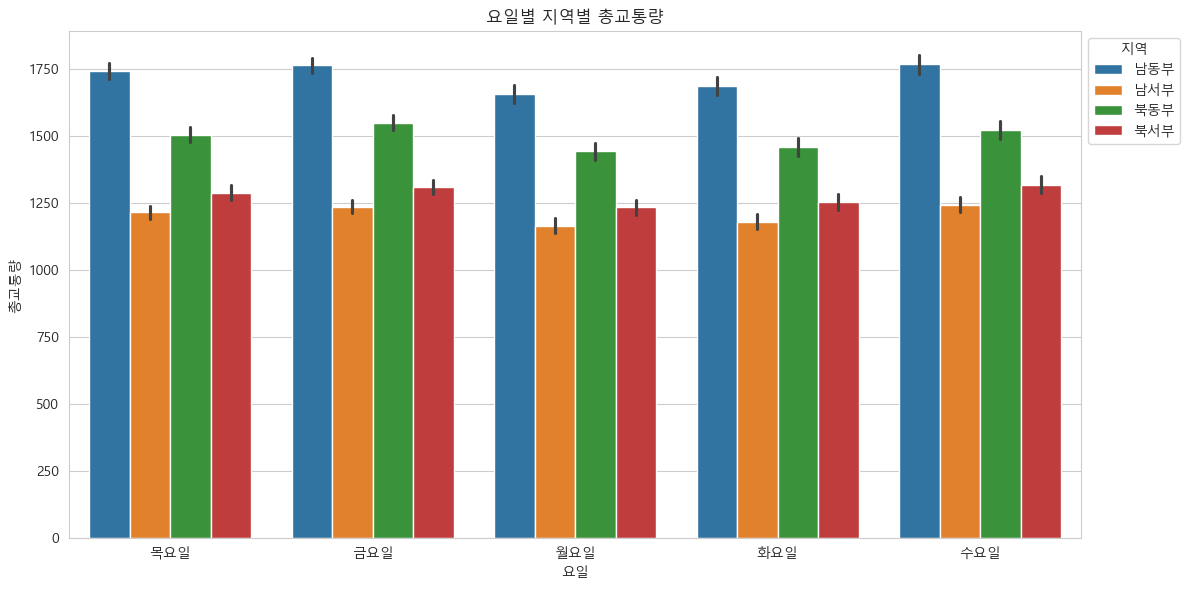

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ‚úÖ ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄÎ•º ÏúÑÌïú Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'  # ÏúàÎèÑÏö∞
# plt.rcParams['font.family'] = 'AppleGothic' # Îß•
plt.rcParams['axes.unicode_minus'] = False

df = region_gb
# ‚úÖ barplot
plt.figure(figsize=(12,6))
sns.barplot(x='weekday', y='Ï¥ùÍµêÌÜµÎüâ', hue='ÏßÄÏó≠', data=df)

plt.title('ÏöîÏùºÎ≥Ñ ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Ï¥ùÍµêÌÜµÎüâ')

# ‚úÖ Î≤îÎ°ÄÎ•º Í∑∏ÎûòÌîÑ Î∞ñ Ïò§Î•∏Ï™Ω ÏúÑÎ°ú
plt.legend(title='ÏßÄÏó≠', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

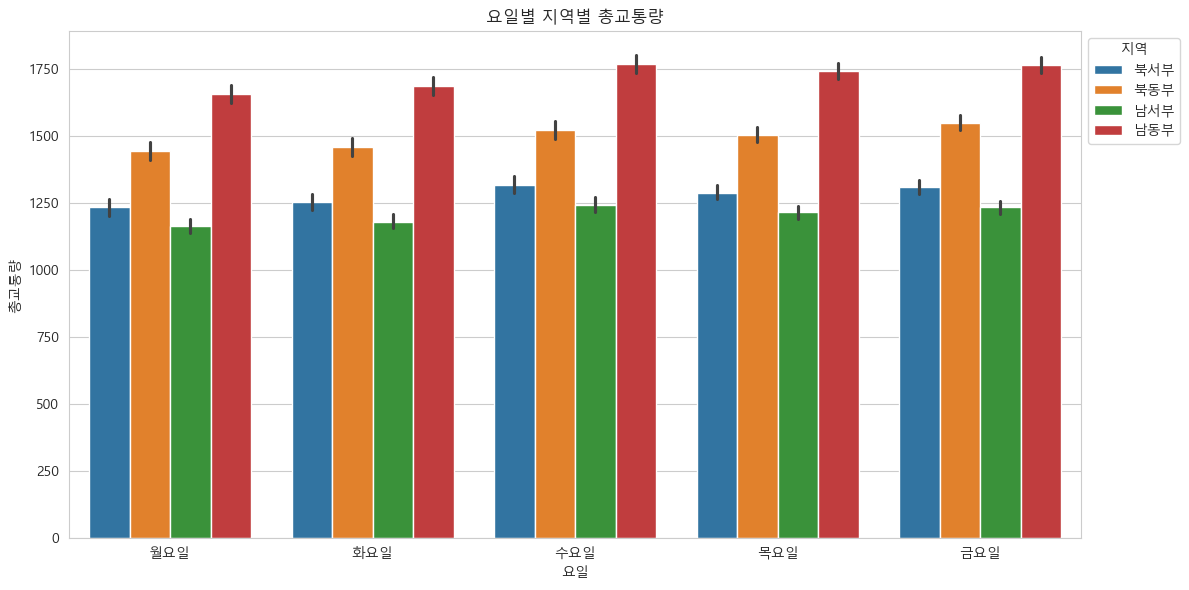

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄÎ•º ÏúÑÌïú Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'  # ÏúàÎèÑÏö∞
# plt.rcParams['font.family'] = 'AppleGothic' # Îß•
plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨
weekday_order = ['ÏõîÏöîÏùº', 'ÌôîÏöîÏùº', 'ÏàòÏöîÏùº', 'Î™©ÏöîÏùº', 'Í∏àÏöîÏùº']
region_order = ['Î∂ÅÏÑúÎ∂Ä', 'Î∂ÅÎèôÎ∂Ä', 'ÎÇ®ÏÑúÎ∂Ä', 'ÎÇ®ÎèôÎ∂Ä']

df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)
df['ÏßÄÏó≠'] = pd.Categorical(df['ÏßÄÏó≠'], categories=region_order, ordered=True)

# ‚úÖ barplot
plt.figure(figsize=(12,6))
sns.barplot(x='weekday', y='Ï¥ùÍµêÌÜµÎüâ', hue='ÏßÄÏó≠', data=df)

plt.title('ÏöîÏùºÎ≥Ñ ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Ï¥ùÍµêÌÜµÎüâ')

# ‚úÖ Î≤îÎ°ÄÎ•º Í∑∏ÎûòÌîÑ Î∞ñ Ïò§Î•∏Ï™Ω ÏúÑÎ°ú
plt.legend(title='ÏßÄÏó≠', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\3288718706.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  commute_summary = commute_df.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\3288718706.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  leave_summary = leave_df.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()


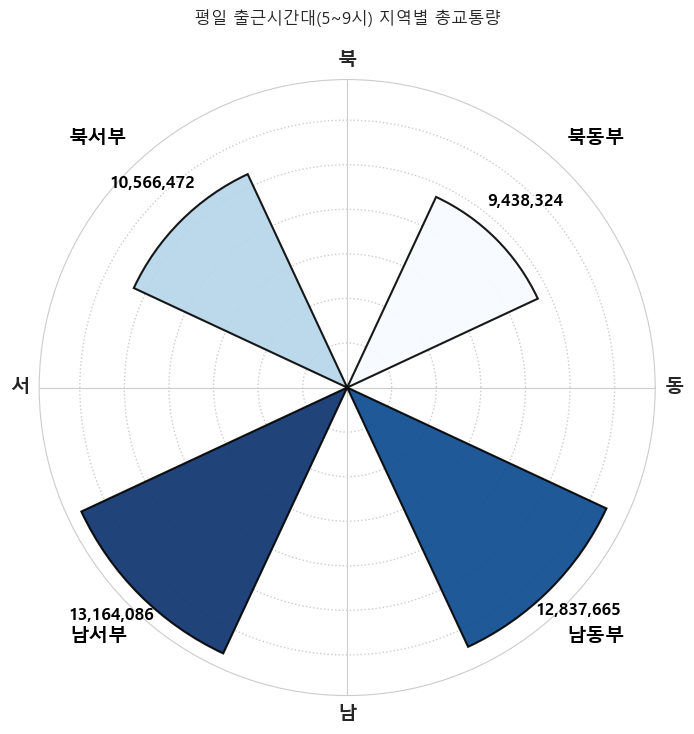

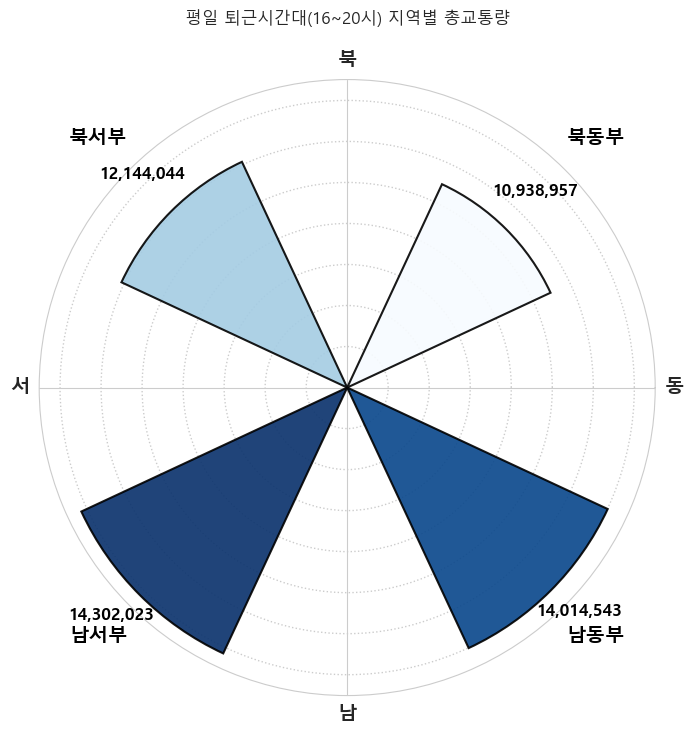

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨ (ÎèôÏùº)
df = region_gb.copy()
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["weekday_eng"] = df["date"].dt.day_name()

day_map = {
    "Monday": "ÏõîÏöîÏùº",
    "Tuesday": "ÌôîÏöîÏùº",
    "Wednesday": "ÏàòÏöîÏùº",
    "Thursday": "Î™©ÏöîÏùº",
    "Friday": "Í∏àÏöîÏùº",
    "Saturday": "ÌÜ†ÏöîÏùº",
    "Sunday": "ÏùºÏöîÏùº"
}
df["weekday"] = df["weekday_eng"].map(day_map)

# ‚úÖ ÌèâÏùºÎßå ÌïÑÌÑ∞ÎßÅ
weekdays_df = df[df["weekday"].isin(["ÏõîÏöîÏùº", "ÌôîÏöîÏùº", "ÏàòÏöîÏùº", "Î™©ÏöîÏùº", "Í∏àÏöîÏùº"])]

# ‚úÖ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ
commute_hours = [5,6,7,8,9]
commute_df = weekdays_df[weekdays_df["hour"].isin(commute_hours)]

commute_summary = commute_df.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
commute_summary = commute_summary.sort_values(["Ï¥ùÍµêÌÜµÎüâ"], ascending=[False])

# ‚úÖ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ
leave_hours = [16,17,18,19,20]
leave_df = weekdays_df[weekdays_df["hour"].isin(leave_hours)]

leave_summary = leave_df.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
leave_summary = leave_summary.sort_values(["Ï¥ùÍµêÌÜµÎüâ"], ascending=[False])

# ‚úÖ Polar plot Ìï®Ïàò
def plot_polar_region(data, title):
    angle_map = {'ÎÇ®ÎèôÎ∂Ä': 315, 'Î∂ÅÎèôÎ∂Ä': 45, 'Î∂ÅÏÑúÎ∂Ä': 135, 'ÎÇ®ÏÑúÎ∂Ä': 225}
    angles = [np.deg2rad(angle_map[area]) for area in data['ÏßÄÏó≠']]
    traffic = data['Ï¥ùÍµêÌÜµÎüâ']
    norm_traffic = (traffic - min(traffic)) / (max(traffic) - min(traffic))
    
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    for angle, height, norm_val in zip(angles, traffic, norm_traffic):
        ax.bar(angle, height, width=np.deg2rad(40), 
               color=plt.cm.Blues(norm_val), 
               edgecolor='black', linewidth=1.5, 
               align='center', alpha=0.9)

    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    ax.set_xticklabels(['Îèô', 'Î∂Å', 'ÏÑú', 'ÎÇ®'], fontsize=14, fontweight='bold')

    for area, angle_deg in angle_map.items():
        angle_rad = np.deg2rad(angle_deg)
        r = max(traffic) * 1.2
        ax.text(angle_rad, r, area, ha='center', va='center', 
                fontsize=14, color='black', fontweight='bold')

    for angle, height in zip(angles, traffic):
        ax.text(angle, height + (max(traffic)*0.14), f'{height:,.0f}', 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    ax.yaxis.grid(True, linestyle=':', linewidth=1)
    ax.set_yticklabels([])

    plt.title(title, pad=20)
    plt.show()

# ‚úÖ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_polar_region(commute_summary, "ÌèâÏùº Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ")
plot_polar_region(leave_summary, "ÌèâÏùº Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ")


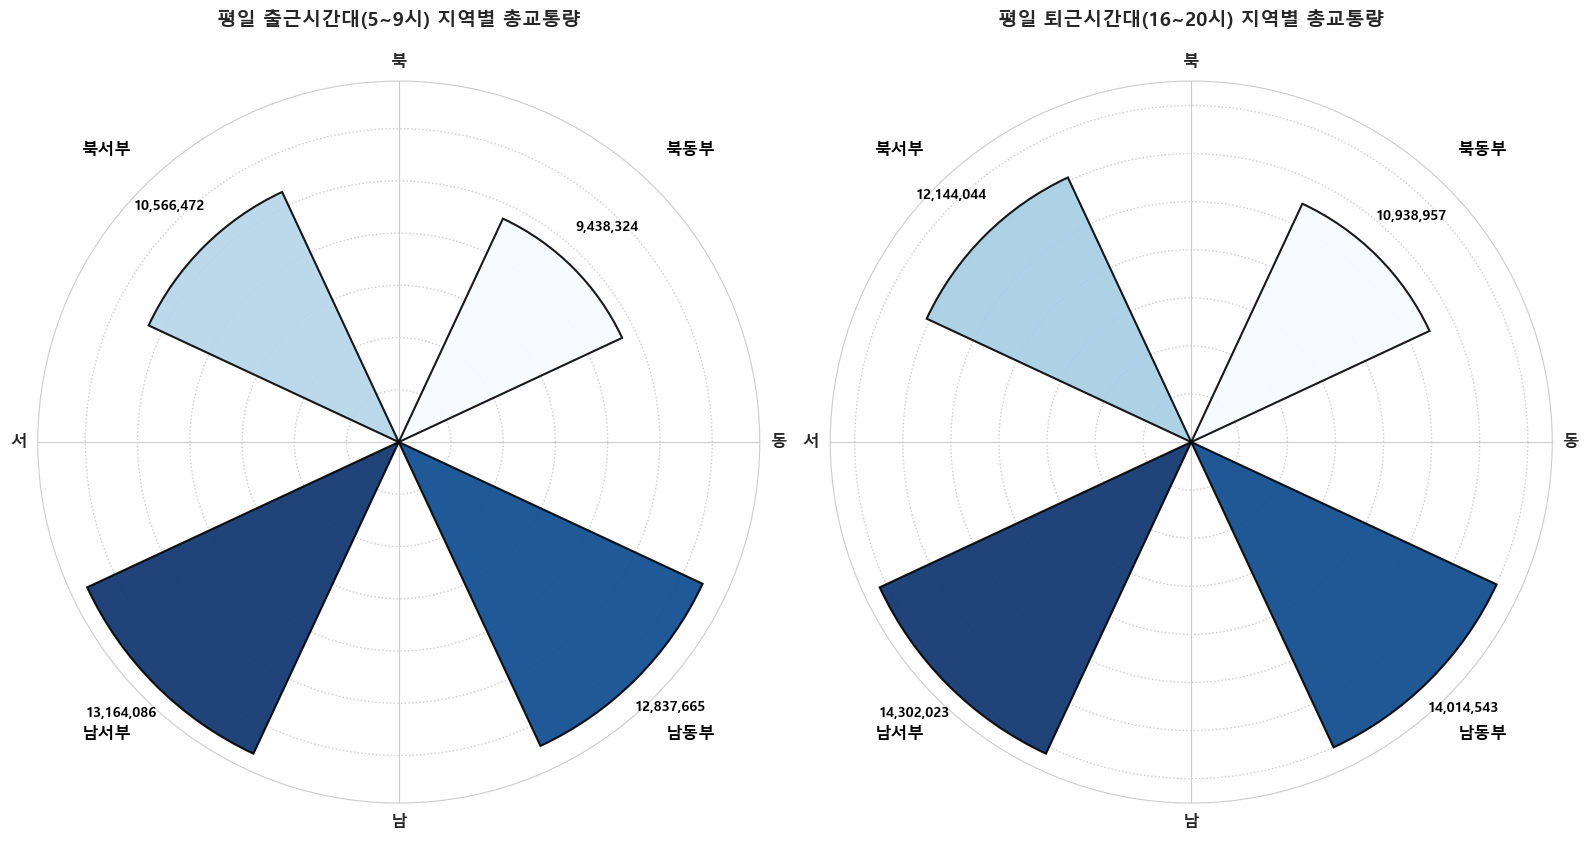

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨ (ÎèôÏùº)
df = region_gb.copy()
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["weekday_eng"] = df["date"].dt.day_name()

day_map = {
    "Monday": "ÏõîÏöîÏùº",
    "Tuesday": "ÌôîÏöîÏùº",
    "Wednesday": "ÏàòÏöîÏùº",
    "Thursday": "Î™©ÏöîÏùº",
    "Friday": "Í∏àÏöîÏùº",
    "Saturday": "ÌÜ†ÏöîÏùº",
    "Sunday": "ÏùºÏöîÏùº"
}
df["weekday"] = df["weekday_eng"].map(day_map)

# ‚úÖ ÌèâÏùºÎßå ÌïÑÌÑ∞ÎßÅ
weekdays_df = df[df["weekday"].isin(["ÏõîÏöîÏùº", "ÌôîÏöîÏùº", "ÏàòÏöîÏùº", "Î™©ÏöîÏùº", "Í∏àÏöîÏùº"])]

# ‚úÖ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ
commute_hours = [5,6,7,8,9]
commute_df = weekdays_df[weekdays_df["hour"].isin(commute_hours)]
commute_summary = commute_df.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
commute_summary = commute_summary.sort_values(["Ï¥ùÍµêÌÜµÎüâ"], ascending=[False])

# ‚úÖ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ
leave_hours = [16,17,18,19,20]
leave_df = weekdays_df[weekdays_df["hour"].isin(leave_hours)]
leave_summary = leave_df.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
leave_summary = leave_summary.sort_values(["Ï¥ùÍµêÌÜµÎüâ"], ascending=[False])

# ‚úÖ Polar plot Ìï®Ïàò (subplotÏö©)
def plot_polar_region_subplot(ax, data, title):
    angle_map = {'ÎÇ®ÎèôÎ∂Ä': 315, 'Î∂ÅÎèôÎ∂Ä': 45, 'Î∂ÅÏÑúÎ∂Ä': 135, 'ÎÇ®ÏÑúÎ∂Ä': 225}
    angles = [np.deg2rad(angle_map[area]) for area in data['ÏßÄÏó≠']]
    traffic = data['Ï¥ùÍµêÌÜµÎüâ']
    norm_traffic = (traffic - min(traffic)) / (max(traffic) - min(traffic))

    for angle, height, norm_val in zip(angles, traffic, norm_traffic):
        ax.bar(angle, height, width=np.deg2rad(40), 
               color=plt.cm.Blues(norm_val), 
               edgecolor='black', linewidth=1.5, 
               align='center', alpha=0.9)

    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    ax.set_xticklabels(['Îèô', 'Î∂Å', 'ÏÑú', 'ÎÇ®'], fontsize=12, fontweight='bold')

    for area, angle_deg in angle_map.items():
        angle_rad = np.deg2rad(angle_deg)
        r = max(traffic) * 1.2
        ax.text(angle_rad, r, area, ha='center', va='center', 
                fontsize=12, color='black', fontweight='bold')

    for angle, height in zip(angles, traffic):
        ax.text(angle, height + (max(traffic)*0.14), f'{height:,.0f}', 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    ax.yaxis.grid(True, linestyle=':', linewidth=1)
    ax.set_yticklabels([])
    ax.set_title(title, pad=20, fontsize=14, fontweight='bold')

# ‚úÖ Îëê Í∑∏ÎûòÌîÑ ÎÇòÎûÄÌûà Ï∂úÎ†•
fig, axes = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(16,8))

plot_polar_region_subplot(axes[0], commute_summary, "ÌèâÏùº Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ")
plot_polar_region_subplot(axes[1], leave_summary, "ÌèâÏùº Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ")

plt.tight_layout()
plt.show()


C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\2192398344.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_summary = df_sub.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].median().reset_index()


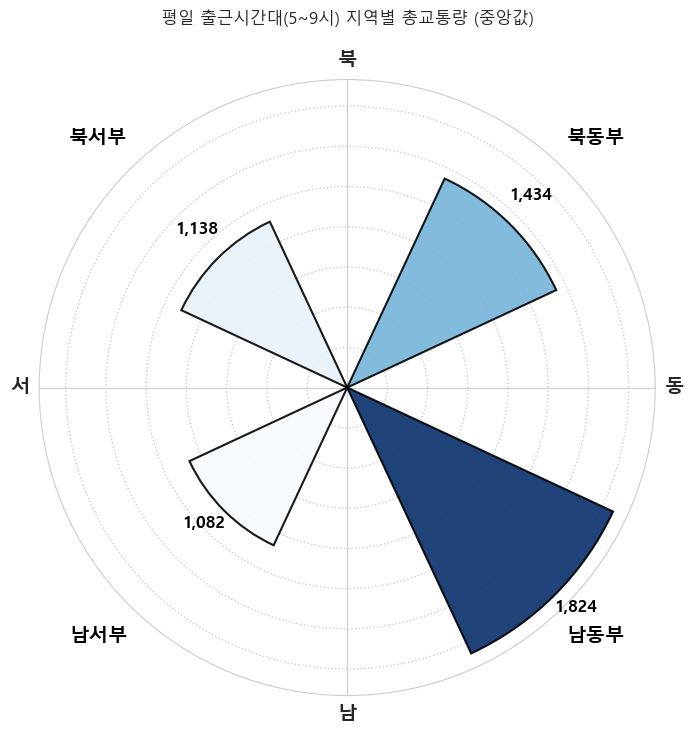

C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\2192398344.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_summary = df_sub.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].median().reset_index()


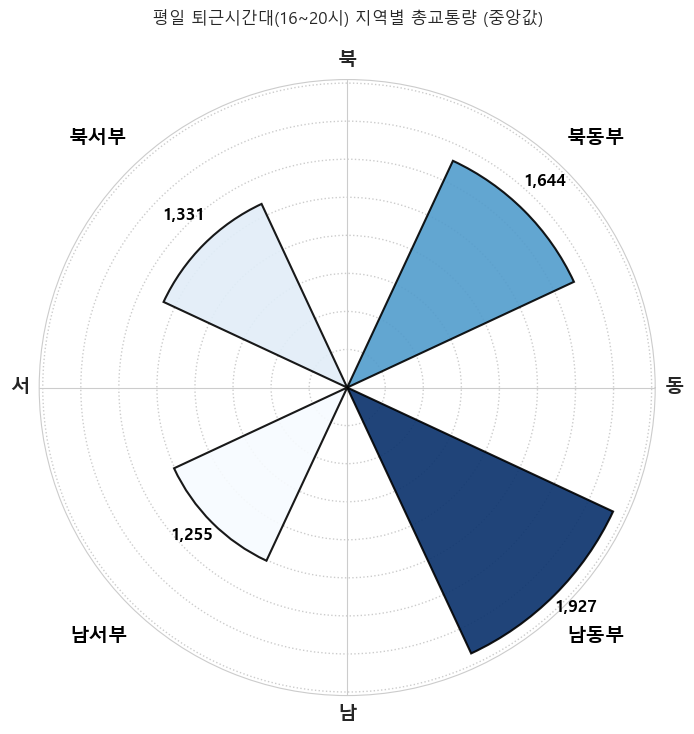

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = region_gb.copy()

# ÎÇ†ÏßúÌòïÏãù Î≥ÄÌôò Î∞è ÏöîÏùº Ïª¨Îüº Ï∂îÍ∞Ä
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["weekday_eng"] = df["date"].dt.day_name()

# ÏòÅÏñ¥ -> ÌïúÍ∏Ä ÏöîÏùº Î≥ÄÌôò
day_map = {
    "Monday": "ÏõîÏöîÏùº",
    "Tuesday": "ÌôîÏöîÏùº",
    "Wednesday": "ÏàòÏöîÏùº",
    "Thursday": "Î™©ÏöîÏùº",
    "Friday": "Í∏àÏöîÏùº",
    "Saturday": "ÌÜ†ÏöîÏùº",
    "Sunday": "ÏùºÏöîÏùº"
}
df["weekday"] = df["weekday_eng"].map(day_map)

# ÌèâÏùºÎßå ÌïÑÌÑ∞ÎßÅ
week_df = df[df["weekday"].isin(["ÏõîÏöîÏùº", "ÌôîÏöîÏùº", "ÏàòÏöîÏùº", "Î™©ÏöîÏùº", "Í∏àÏöîÏùº"])]

# ‚úÖ Polar plot Ìï®Ïàò
def plot_polar_median(df_sub, title):
    region_summary = df_sub.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].median().reset_index()
    region_summary = region_summary.sort_values(["Ï¥ùÍµêÌÜµÎüâ"], ascending=False)

    angle_map = {'ÎÇ®ÎèôÎ∂Ä': 315, 'Î∂ÅÎèôÎ∂Ä': 45, 'Î∂ÅÏÑúÎ∂Ä': 135, 'ÎÇ®ÏÑúÎ∂Ä': 225}
    angles = [np.deg2rad(angle_map[area]) for area in region_summary['ÏßÄÏó≠']]
    traffic = region_summary['Ï¥ùÍµêÌÜµÎüâ']
    norm_traffic = (traffic - min(traffic)) / (max(traffic) - min(traffic))

    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    # ÎßâÎåÄ
    for angle, height, norm_val in zip(angles, traffic, norm_traffic):
        ax.bar(angle, height, width=np.deg2rad(40),
               color=plt.cm.Blues(norm_val),
               edgecolor='black', linewidth=1.5,
               align='center', alpha=0.9)

    # ÎèôÏÑúÎÇ®Î∂Å ÎùºÎ≤®
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    ax.set_xticklabels(['Îèô', 'Î∂Å', 'ÏÑú', 'ÎÇ®'], fontsize=14, fontweight='bold')

    # ÎåÄÍ∞ÅÏÑ† Î∞©ÏúÑ ÎùºÎ≤®
    for area, angle_deg in angle_map.items():
        angle_rad = np.deg2rad(angle_deg)
        r = max(traffic) * 1.2
        ax.text(angle_rad, r, area, ha='center', va='center',
                fontsize=14, color='black', fontweight='bold')

    # ÎßâÎåÄ ÏúÑ Í∞í
    for angle, height in zip(angles, traffic):
        ax.text(angle, height + (max(traffic)*0.1), f'{height:,.0f}',
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    # Î∞òÏßÄÎ¶Ñ ÎààÍ∏à Ï†êÏÑ†ÏúºÎ°ú
    ax.yaxis.grid(True, linestyle=':', linewidth=1)
    ax.set_yticklabels([])

    plt.title(title, pad=20)
    plt.show()

# ‚úÖ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ (5~9Ïãú)
commute_df = week_df[week_df["hour"].isin([5,6,7,8,9])]
plot_polar_median(commute_df, "ÌèâÏùº Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ (Ï§ëÏïôÍ∞í)")

# ‚úÖ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ (16~20Ïãú)
leave_df = week_df[week_df["hour"].isin([16,17,18,19,20])]
plot_polar_median(leave_df, "ÌèâÏùº Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ (Ï§ëÏïôÍ∞í)")


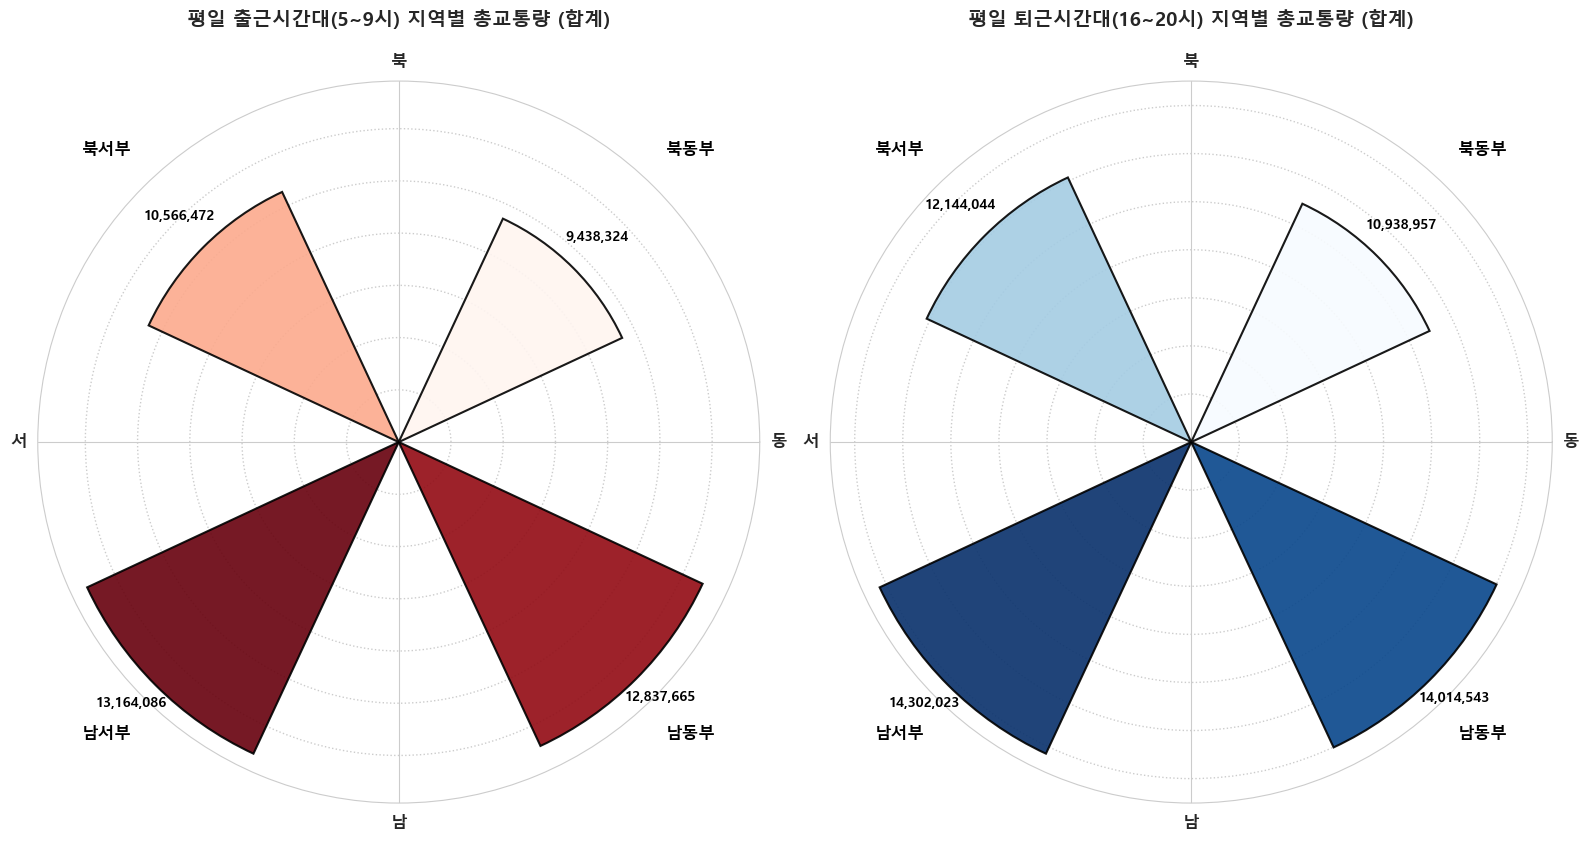

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = region_gb.copy()

# ÎÇ†ÏßúÌòïÏãù Î≥ÄÌôò Î∞è ÏöîÏùº Ïª¨Îüº Ï∂îÍ∞Ä
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["weekday_eng"] = df["date"].dt.day_name()

day_map = {
    "Monday": "ÏõîÏöîÏùº",
    "Tuesday": "ÌôîÏöîÏùº",
    "Wednesday": "ÏàòÏöîÏùº",
    "Thursday": "Î™©ÏöîÏùº",
    "Friday": "Í∏àÏöîÏùº",
    "Saturday": "ÌÜ†ÏöîÏùº",
    "Sunday": "ÏùºÏöîÏùº"
}
df["weekday"] = df["weekday_eng"].map(day_map)

# ÌèâÏùºÎßå ÌïÑÌÑ∞ÎßÅ
week_df = df[df["weekday"].isin(["ÏõîÏöîÏùº", "ÌôîÏöîÏùº", "ÏàòÏöîÏùº", "Î™©ÏöîÏùº", "Í∏àÏöîÏùº"])]

# ‚úÖ subplotÏö© Polar plot Ìï®Ïàò (ÏÉâÏÉÅÎßµ ÏÑ†ÌÉù Í∞ÄÎä•)
def plot_polar_sum_subplot(ax, df_sub, title, cmap):
    region_summary = df_sub.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
    region_summary = region_summary.sort_values(["Ï¥ùÍµêÌÜµÎüâ"], ascending=False)

    angle_map = {'ÎÇ®ÎèôÎ∂Ä': 315, 'Î∂ÅÎèôÎ∂Ä': 45, 'Î∂ÅÏÑúÎ∂Ä': 135, 'ÎÇ®ÏÑúÎ∂Ä': 225}
    angles = [np.deg2rad(angle_map[area]) for area in region_summary['ÏßÄÏó≠']]
    traffic = region_summary['Ï¥ùÍµêÌÜµÎüâ']
    norm_traffic = (traffic - min(traffic)) / (max(traffic) - min(traffic))

    for angle, height, norm_val in zip(angles, traffic, norm_traffic):
        ax.bar(angle, height, width=np.deg2rad(40),
               color=cmap(norm_val),
               edgecolor='black', linewidth=1.5,
               align='center', alpha=0.9)

    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    ax.set_xticklabels(['Îèô', 'Î∂Å', 'ÏÑú', 'ÎÇ®'], fontsize=12, fontweight='bold')

    for area, angle_deg in angle_map.items():
        angle_rad = np.deg2rad(angle_deg)
        r = max(traffic) * 1.2
        ax.text(angle_rad, r, area, ha='center', va='center',
                fontsize=12, color='black', fontweight='bold')

    for angle, height in zip(angles, traffic):
        ax.text(angle, height + (max(traffic)*0.1), f'{height:,.0f}',
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    ax.yaxis.grid(True, linestyle=':', linewidth=1)
    ax.set_yticklabels([])
    ax.set_title(title, pad=20, fontsize=14, fontweight='bold')

# ‚úÖ Ï∂úÍ∑º/Ìá¥Í∑º Îç∞Ïù¥ÌÑ∞
commute_df = week_df[week_df["hour"].isin([5,6,7,8,9])]
leave_df = week_df[week_df["hour"].isin([16,17,18,19,20])]

# ‚úÖ ÎÇòÎûÄÌûà Ï∂úÎ†• (Ï∂úÍ∑ºÏùÄ Reds, Ìá¥Í∑ºÏùÄ Blues)
fig, axes = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(16,8))

plot_polar_sum_subplot(axes[0], commute_df, "ÌèâÏùº Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ (Ìï©Í≥Ñ)", plt.cm.Reds)
plot_polar_sum_subplot(axes[1], leave_df, "ÌèâÏùº Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ (Ìï©Í≥Ñ)", plt.cm.Blues)

plt.tight_layout()
plt.show()


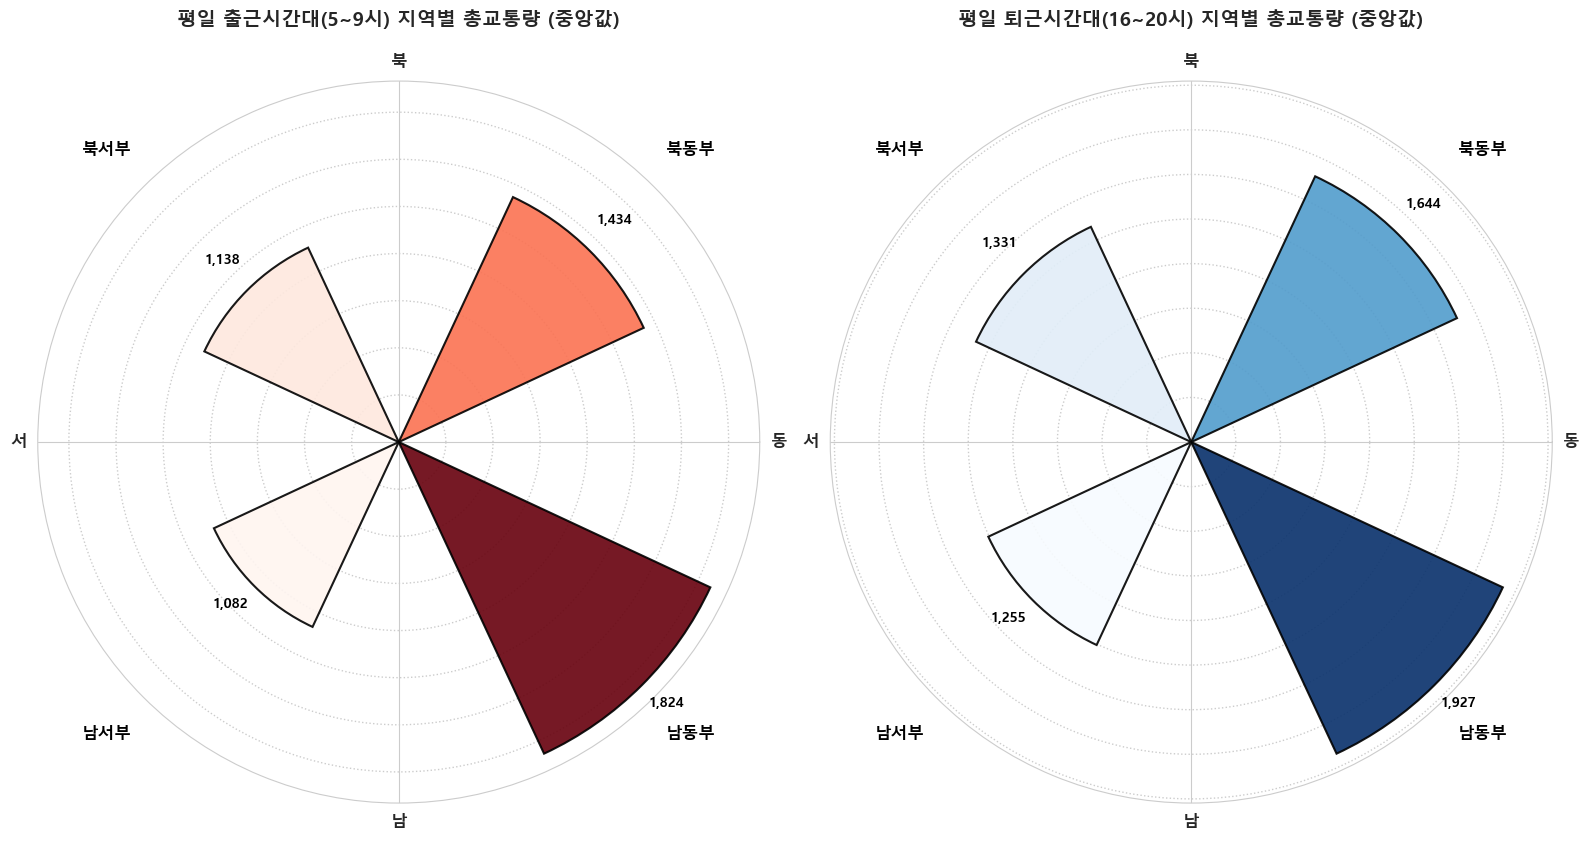

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = region_gb.copy()

# ÎÇ†ÏßúÌòïÏãù Î≥ÄÌôò Î∞è ÏöîÏùº Ïª¨Îüº Ï∂îÍ∞Ä
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["weekday_eng"] = df["date"].dt.day_name()

day_map = {
    "Monday": "ÏõîÏöîÏùº",
    "Tuesday": "ÌôîÏöîÏùº",
    "Wednesday": "ÏàòÏöîÏùº",
    "Thursday": "Î™©ÏöîÏùº",
    "Friday": "Í∏àÏöîÏùº",
    "Saturday": "ÌÜ†ÏöîÏùº",
    "Sunday": "ÏùºÏöîÏùº"
}
df["weekday"] = df["weekday_eng"].map(day_map)

# ÌèâÏùºÎßå ÌïÑÌÑ∞ÎßÅ
week_df = df[df["weekday"].isin(["ÏõîÏöîÏùº", "ÌôîÏöîÏùº", "ÏàòÏöîÏùº", "Î™©ÏöîÏùº", "Í∏àÏöîÏùº"])]

# ‚úÖ subplotÏö© Polar plot Ìï®Ïàò (colormap ÏÑ†ÌÉù Í∞ÄÎä•)
def plot_polar_median_subplot(ax, df_sub, title, cmap):
    region_summary = df_sub.groupby(["ÏßÄÏó≠"])["Ï¥ùÍµêÌÜµÎüâ"].median().reset_index()
    region_summary = region_summary.sort_values(["Ï¥ùÍµêÌÜµÎüâ"], ascending=False)

    angle_map = {'ÎÇ®ÎèôÎ∂Ä': 315, 'Î∂ÅÎèôÎ∂Ä': 45, 'Î∂ÅÏÑúÎ∂Ä': 135, 'ÎÇ®ÏÑúÎ∂Ä': 225}
    angles = [np.deg2rad(angle_map[area]) for area in region_summary['ÏßÄÏó≠']]
    traffic = region_summary['Ï¥ùÍµêÌÜµÎüâ']
    norm_traffic = (traffic - min(traffic)) / (max(traffic) - min(traffic))

    for angle, height, norm_val in zip(angles, traffic, norm_traffic):
        ax.bar(angle, height, width=np.deg2rad(40),
               color=cmap(norm_val),
               edgecolor='black', linewidth=1.5,
               align='center', alpha=0.9)

    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    ax.set_xticklabels(['Îèô', 'Î∂Å', 'ÏÑú', 'ÎÇ®'], fontsize=12, fontweight='bold')

    for area, angle_deg in angle_map.items():
        angle_rad = np.deg2rad(angle_deg)
        r = max(traffic) * 1.2
        ax.text(angle_rad, r, area, ha='center', va='center',
                fontsize=12, color='black', fontweight='bold')

    for angle, height in zip(angles, traffic):
        ax.text(angle, height + (max(traffic)*0.1), f'{height:,.0f}',
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    ax.yaxis.grid(True, linestyle=':', linewidth=1)
    ax.set_yticklabels([])
    ax.set_title(title, pad=20, fontsize=14, fontweight='bold')

# ‚úÖ Ï∂úÍ∑º/Ìá¥Í∑º Îç∞Ïù¥ÌÑ∞
commute_df = week_df[week_df["hour"].isin([5,6,7,8,9])]
leave_df = week_df[week_df["hour"].isin([16,17,18,19,20])]

# ‚úÖ ÎÇòÎûÄÌûà Ï∂úÎ†• (Ï∂úÍ∑ºÏùÄ Reds, Ìá¥Í∑ºÏùÄ Blues)
fig, axes = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(16,8))

plot_polar_median_subplot(axes[0], commute_df, "ÌèâÏùº Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ (Ï§ëÏïôÍ∞í)", plt.cm.Reds)
plot_polar_median_subplot(axes[1], leave_df, "ÌèâÏùº Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ (Ï§ëÏïôÍ∞í)", plt.cm.Blues)

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = region_gb

# ÎÇ†ÏßúÌòïÏãù Î≥ÄÌôò Î∞è ÏöîÏùº Ïª¨Îüº Ï∂îÍ∞Ä (ÏòÅÏñ¥Î°ú)
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["weekday_eng"] = df["date"].dt.day_name()

# ÏòÅÏñ¥ -> ÌïúÍ∏Ä ÏöîÏùº Î≥ÄÌôò
day_map = {
    "Monday": "ÏõîÏöîÏùº",
    "Tuesday": "ÌôîÏöîÏùº",
    "Wednesday": "ÏàòÏöîÏùº",
    "Thursday": "Î™©ÏöîÏùº",
    "Friday": "Í∏àÏöîÏùº",
    "Saturday": "ÌÜ†ÏöîÏùº",
    "Sunday": "ÏùºÏöîÏùº"
}
df["weekday"] = df["weekday_eng"].map(day_map)


# ÏöîÏùºÎ≥Ñ ÏßÄÏó≠Î≥Ñ Ï¥ùÍµêÌÜµÎüâ ÏßëÍ≥Ñ
region_summary = weekend_df.groupby(["weekday", "ÏßÄÏó≠",'Íµ¨'])["Ï¥ùÍµêÌÜµÎüâ"].median().reset_index()
region_summary = region_summary.sort_values(["weekday", "Ï¥ùÍµêÌÜµÎüâ"], ascending=[False, False])

# ÏöîÏïΩ Í≤∞Í≥º ÌôïÏù∏
print(region_summary)


    weekday   ÏßÄÏó≠    Íµ¨    Ï¥ùÍµêÌÜµÎüâ
191     ÌôîÏöîÏùº  Î∂ÅÎèôÎ∂Ä  Íµ¨Î¶¨Ïãú  3491.5
170     ÌôîÏöîÏùº  ÎÇ®ÎèôÎ∂Ä  Í≥ºÏ≤úÏãú  3333.0
204     ÌôîÏöîÏùº  Î∂ÅÏÑúÎ∂Ä  ÎßàÌè¨Íµ¨  2414.0
183     ÌôîÏöîÏùº  ÎÇ®ÏÑúÎ∂Ä  ÎßàÌè¨Íµ¨  2329.0
200     ÌôîÏöîÏùº  Î∂ÅÎèôÎ∂Ä  Ï§ëÎûëÍµ¨  2000.0
..      ...  ...  ...     ...
41      Í∏àÏöîÏùº  Î∂ÅÏÑúÎ∂Ä   Ï§ëÍµ¨   493.5
17      Í∏àÏöîÏùº  ÎÇ®ÏÑúÎ∂Ä  ÏÑúÏ¥àÍµ¨   484.0
1       Í∏àÏöîÏùº  ÎÇ®ÎèôÎ∂Ä  Í∞ïÎèôÍµ¨   481.0
22      Í∏àÏöîÏùº  Î∂ÅÎèôÎ∂Ä  Í¥ëÏßÑÍµ¨   441.5
11      Í∏àÏöîÏùº  ÎÇ®ÏÑúÎ∂Ä  Í¥ëÎ™ÖÏãú    79.5

[210 rows x 4 columns]


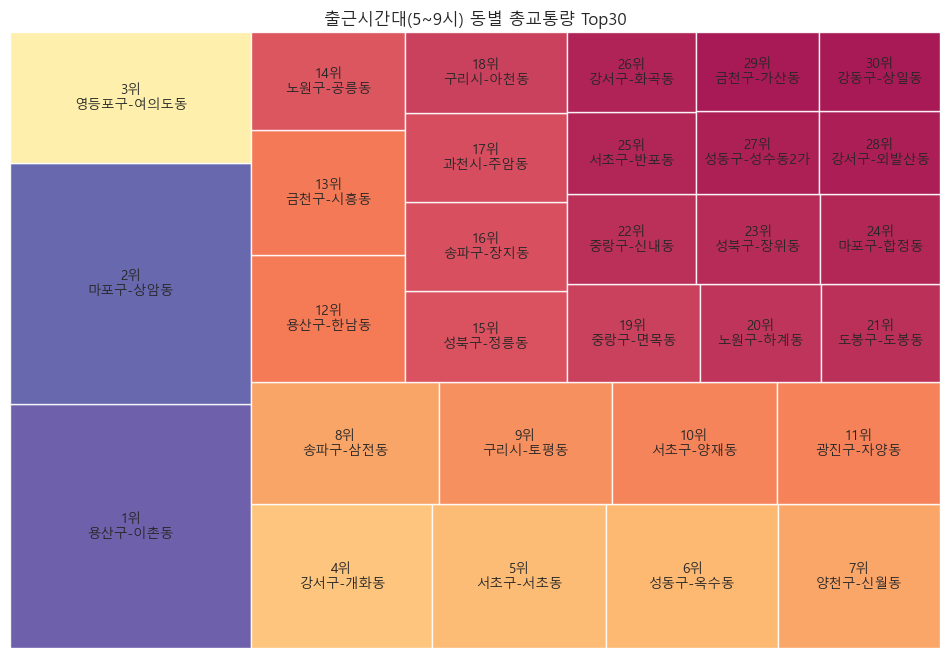

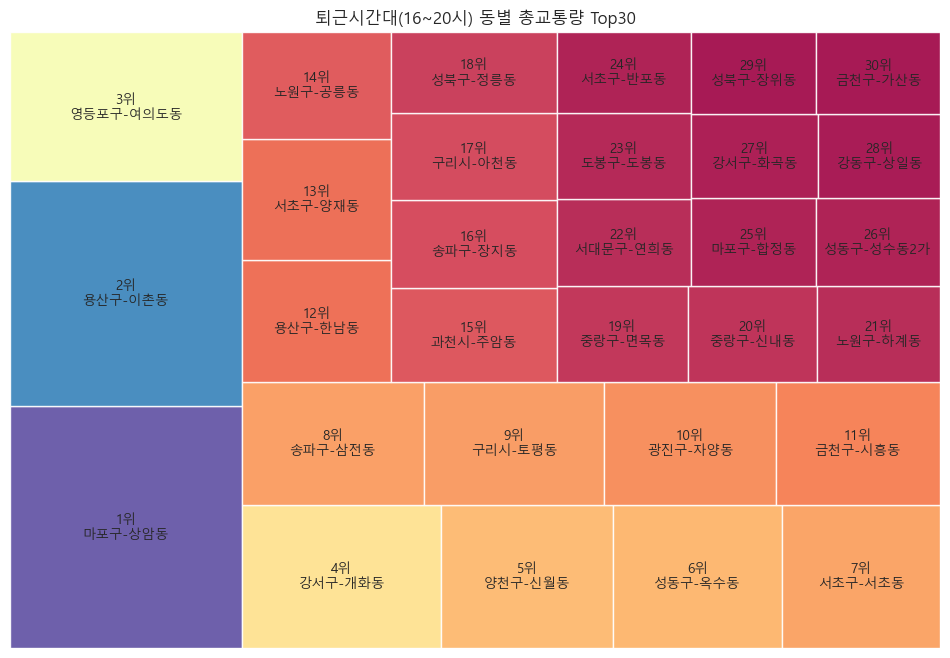

In [31]:
import squarify
import matplotlib.pyplot as plt
import numpy as np

# ‚úÖ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ (5~9Ïãú)
commute_df = week_df[week_df["hour"].isin([5,6,7,8,9])]
commute_summary = commute_df.groupby(["Íµ¨", "Îèô"]).agg({"Ï¥ùÍµêÌÜµÎüâ":"sum"}).reset_index()
top30_commute = commute_summary.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(30).copy()
top30_commute["rank"] = range(1, len(top30_commute)+1)
top30_commute["ÎùºÎ≤®"] = top30_commute["rank"].astype(str) + "ÏúÑ\n" + top30_commute["Íµ¨"] + "-" + top30_commute["Îèô"]

# Ïª¨Îü¨Îßµ
norm_traffic = (top30_commute["Ï¥ùÍµêÌÜµÎüâ"] - top30_commute["Ï¥ùÍµêÌÜµÎüâ"].min()) / (top30_commute["Ï¥ùÍµêÌÜµÎüâ"].max() - top30_commute["Ï¥ùÍµêÌÜµÎüâ"].min())
colors = [plt.cm.Spectral(val) for val in norm_traffic]

plt.figure(figsize=(12,8))
squarify.plot(sizes=top30_commute["Ï¥ùÍµêÌÜµÎüâ"], label=top30_commute["ÎùºÎ≤®"], 
              color=colors, alpha=0.9,  text_kwargs={'fontsize':9.7})
plt.axis('off')
plt.title("Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÎèôÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top30")
plt.show()


# ‚úÖ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ (16~20Ïãú)
leave_df = week_df[week_df["hour"].isin([16,17,18,19,20])]
leave_summary = leave_df.groupby(["Íµ¨", "Îèô"]).agg({"Ï¥ùÍµêÌÜµÎüâ":"sum"}).reset_index()
top30_leave = leave_summary.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(30).copy()
top30_leave["rank"] = range(1, len(top30_leave)+1)
top30_leave["ÎùºÎ≤®"] = top30_leave["rank"].astype(str) + "ÏúÑ\n" + top30_leave["Íµ¨"] + "-" + top30_leave["Îèô"]

# Ïª¨Îü¨Îßµ
norm_traffic = (top30_leave["Ï¥ùÍµêÌÜµÎüâ"] - top30_leave["Ï¥ùÍµêÌÜµÎüâ"].min()) / (top30_leave["Ï¥ùÍµêÌÜµÎüâ"].max() - top30_leave["Ï¥ùÍµêÌÜµÎüâ"].min())
colors = [plt.cm.Spectral(val) for val in norm_traffic]

plt.figure(figsize=(12,8))
squarify.plot(sizes=top30_leave["Ï¥ùÍµêÌÜµÎüâ"], label=top30_leave["ÎùºÎ≤®"], 
              color=colors, alpha=0.9,  text_kwargs={'fontsize':9.7})
plt.axis('off')
plt.title("Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÎèôÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top30")
plt.show()



C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\4208889161.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Íµ¨-Îèô", x="Ï¥ùÍµêÌÜµÎüâ", data=top10_commute, palette="Blues_d")
C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\4208889161.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Íµ¨-Îèô", x="Ï¥ùÍµêÌÜµÎüâ", data=top10_leave, palette="Oranges_d")


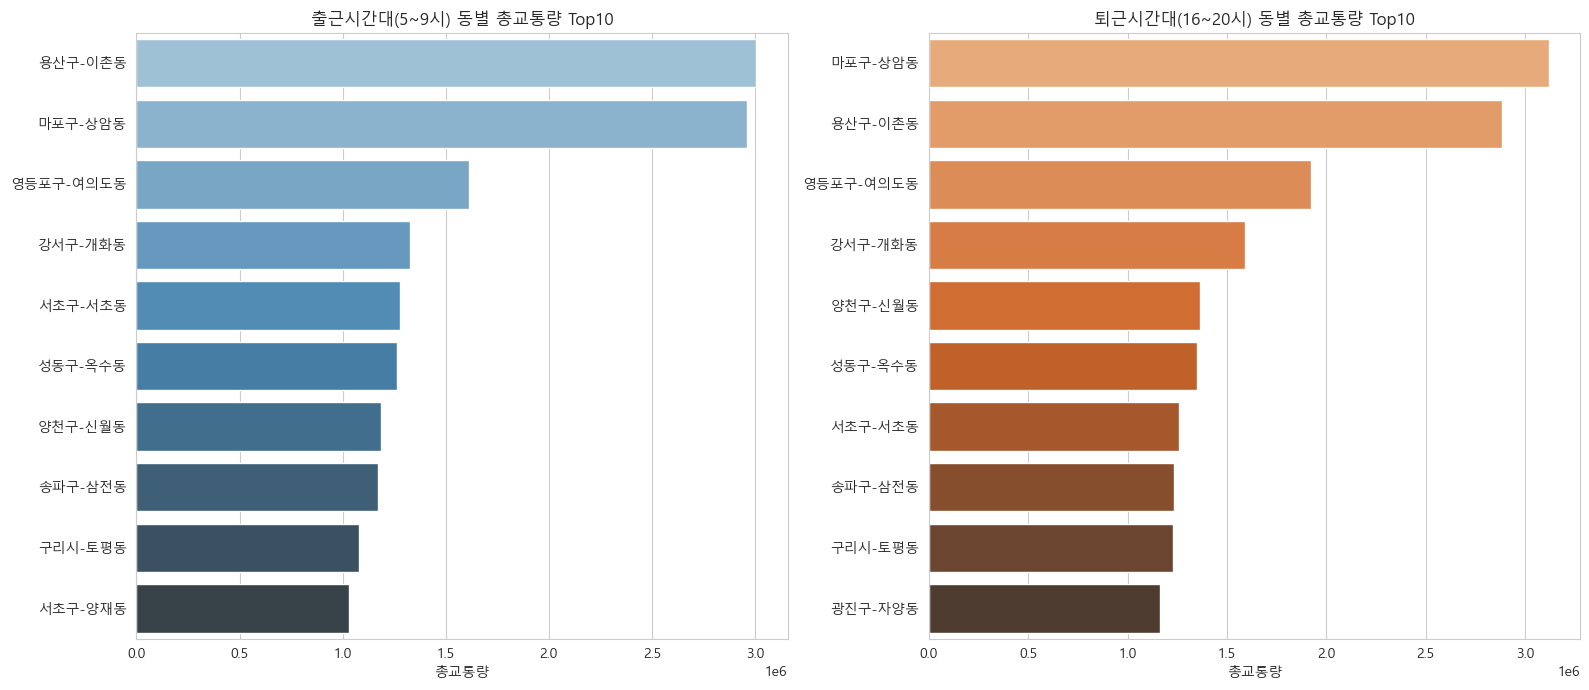

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ (5~9Ïãú)
commute_df = week_df[week_df["hour"].isin([5,6,7,8,9])]
commute_summary = commute_df.groupby(["Íµ¨", "Îèô"]).agg({"Ï¥ùÍµêÌÜµÎüâ":"sum"}).reset_index()
top10_commute = commute_summary.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(10).copy()
top10_commute["Íµ¨-Îèô"] = top10_commute["Íµ¨"] + "-" + top10_commute["Îèô"]

# ‚úÖ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ (16~20Ïãú)
leave_df = week_df[week_df["hour"].isin([16,17,18,19,20])]
leave_summary = leave_df.groupby(["Íµ¨", "Îèô"]).agg({"Ï¥ùÍµêÌÜµÎüâ":"sum"}).reset_index()
top10_leave = leave_summary.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(10).copy()
top10_leave["Íµ¨-Îèô"] = top10_leave["Íµ¨"] + "-" + top10_leave["Îèô"]

# ‚úÖ subplotÏúºÎ°ú barplot ÎÇòÎûÄÌûà
plt.figure(figsize=(16,7))

# ‚ñ∂ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ
plt.subplot(1,2,1)
sns.barplot(y="Íµ¨-Îèô", x="Ï¥ùÍµêÌÜµÎüâ", data=top10_commute, palette="Blues_d")
plt.title("Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÎèôÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10")
plt.xlabel("Ï¥ùÍµêÌÜµÎüâ")
plt.ylabel("")

# ‚ñ∂ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ
plt.subplot(1,2,2)
sns.barplot(y="Íµ¨-Îèô", x="Ï¥ùÍµêÌÜµÎüâ", data=top10_leave, palette="Oranges_d")
plt.title("Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÎèôÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10")
plt.xlabel("Ï¥ùÍµêÌÜµÎüâ")
plt.ylabel("")

plt.tight_layout()
plt.show()



C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\946172442.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_traffic, x="hour", y="Ï¥ùÍµêÌÜµÎüâ", palette="viridis")


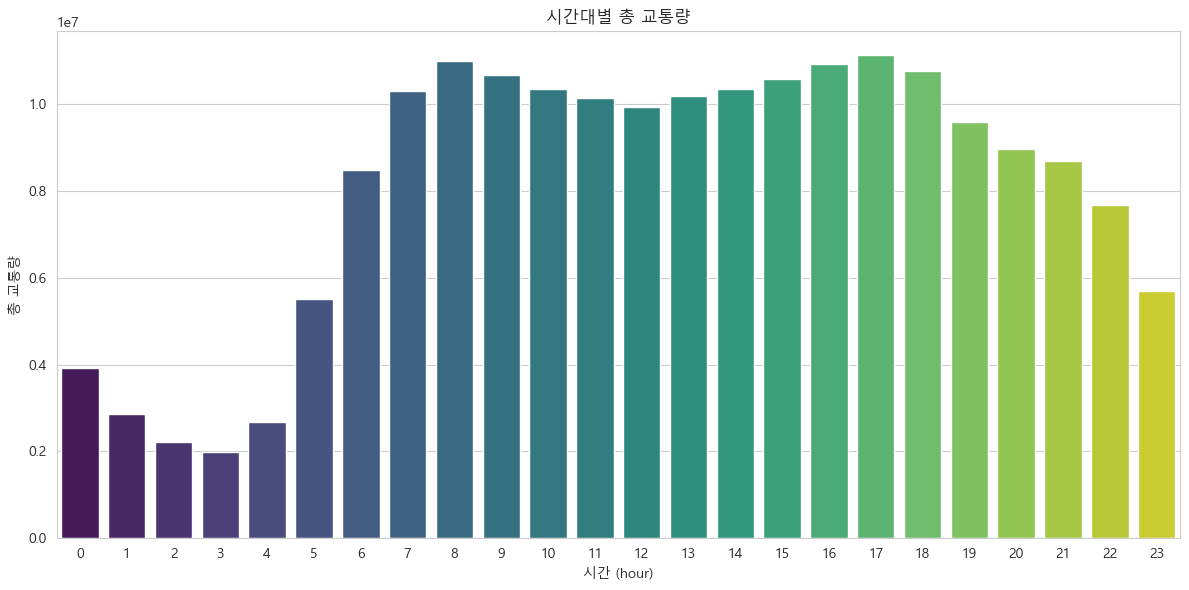

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏãúÍ∞ÑÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ ÏßëÍ≥Ñ
hourly_traffic = df.groupby("hour")["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_traffic, x="hour", y="Ï¥ùÍµêÌÜµÎüâ", palette="viridis")
plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï¥ù ÍµêÌÜµÎüâ")
plt.xlabel("ÏãúÍ∞Ñ (hour)")
plt.ylabel("Ï¥ù ÍµêÌÜµÎüâ")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\2409847033.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="spot_name", x="Ï¥ùÍµêÌÜµÎüâ", data=top10_commute, palette="Blues_d")
C:\Users\s2arora\AppData\Local\Temp\ipykernel_32336\2409847033.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="spot_name", x="Ï¥ùÍµêÌÜµÎüâ", data=top10_leave, palette="Oranges_d")


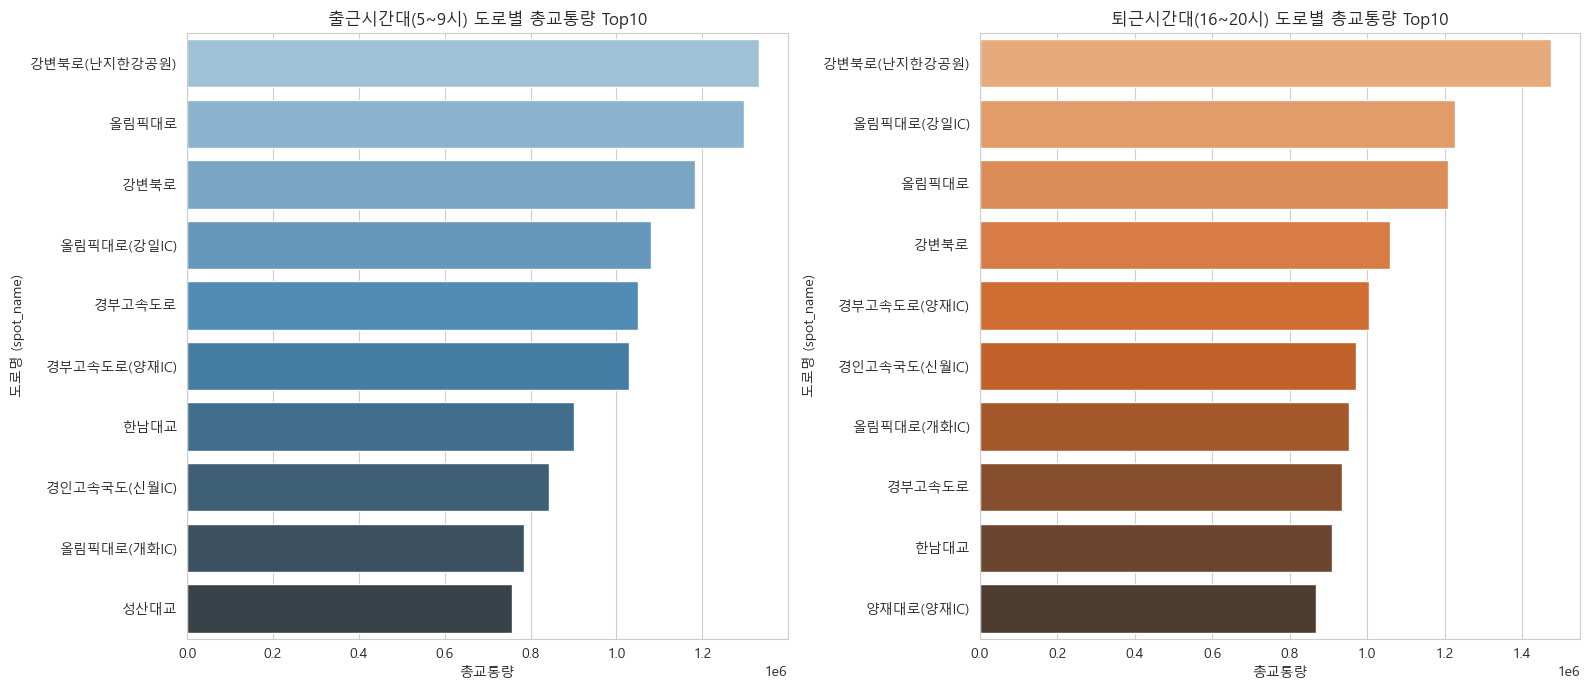

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ (5~9Ïãú)
commute_df = df[df["hour"].isin([5,6,7,8,9])]
commute_summary = commute_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
top10_commute = commute_summary.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(10)

# ‚úÖ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ (16~20Ïãú)
leave_df = df[df["hour"].isin([16,17,18,19,20])]
leave_summary = leave_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
top10_leave = leave_summary.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(10)

# ‚úÖ subplot ÏúºÎ°ú barplot ÎÇòÎûÄÌûà
plt.figure(figsize=(16,7))

# ‚ñ∂ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ
plt.subplot(1,2,1)
sns.barplot(y="spot_name", x="Ï¥ùÍµêÌÜµÎüâ", data=top10_commute, palette="Blues_d")
plt.title("Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10")
plt.xlabel("Ï¥ùÍµêÌÜµÎüâ")
plt.ylabel("ÎèÑÎ°úÎ™Ö (spot_name)")

# ‚ñ∂ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ
plt.subplot(1,2,2)
sns.barplot(y="spot_name", x="Ï¥ùÍµêÌÜµÎüâ", data=top10_leave, palette="Oranges_d")
plt.title("Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10")
plt.xlabel("Ï¥ùÍµêÌÜµÎüâ")
plt.ylabel("ÎèÑÎ°úÎ™Ö (spot_name)")

plt.tight_layout()
plt.show()


In [38]:
from IPython.display import display

# ‚úÖ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ (5~9Ïãú)
commute_df = df[df["hour"].isin([5,6,7,8,9])]
commute_summary = commute_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
top10_commute = commute_summary.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(10)
top10_commute = top10_commute.reset_index(drop=True)
top10_commute.index += 1  # ÏàúÏúÑ ÌëúÏãú

print("üöó Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10")
display(top10_commute)

# ‚úÖ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ (16~20Ïãú)
leave_df = df[df["hour"].isin([16,17,18,19,20])]
leave_summary = leave_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
top10_leave = leave_summary.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(10)
top10_leave = top10_leave.reset_index(drop=True)
top10_leave.index += 1  # ÏàúÏúÑ ÌëúÏãú

print("üöó Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10")
display(top10_leave)



üöó Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10


spot_name     Ï¥ùÍµêÌÜµÎüâ
1   Í∞ïÎ≥ÄÎ∂ÅÎ°ú(ÎÇúÏßÄÌïúÍ∞ïÍ≥µÏõê)  1331689
2          Ïò¨Î¶ºÌîΩÎåÄÎ°ú  1296795
3           Í∞ïÎ≥ÄÎ∂ÅÎ°ú  1183694
4    Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞ïÏùºIC)  1081426
5         Í≤ΩÎ∂ÄÍ≥†ÏÜçÎèÑÎ°ú  1050911
6   Í≤ΩÎ∂ÄÍ≥†ÏÜçÎèÑÎ°ú(ÏñëÏû¨IC)  1028921
7           ÌïúÎÇ®ÎåÄÍµê   901245
8   Í≤ΩÏù∏Í≥†ÏÜçÍµ≠ÎèÑ(Ïã†ÏõîIC)   843666
9    Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞úÌôîIC)   784197
10          ÏÑ±ÏÇ∞ÎåÄÍµê   757488

üöó Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10


spot_name     Ï¥ùÍµêÌÜµÎüâ
1   Í∞ïÎ≥ÄÎ∂ÅÎ°ú(ÎÇúÏßÄÌïúÍ∞ïÍ≥µÏõê)  1475869
2    Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞ïÏùºIC)  1227635
3          Ïò¨Î¶ºÌîΩÎåÄÎ°ú  1208668
4           Í∞ïÎ≥ÄÎ∂ÅÎ°ú  1060315
5   Í≤ΩÎ∂ÄÍ≥†ÏÜçÎèÑÎ°ú(ÏñëÏû¨IC)  1006245
6   Í≤ΩÏù∏Í≥†ÏÜçÍµ≠ÎèÑ(Ïã†ÏõîIC)   971177
7    Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞úÌôîIC)   952623
8         Í≤ΩÎ∂ÄÍ≥†ÏÜçÎèÑÎ°ú   935513
9           ÌïúÎÇ®ÎåÄÍµê   909161
10    ÏñëÏû¨ÎåÄÎ°ú(ÏñëÏû¨IC)   867814

In [39]:
from IPython.display import display

# ‚úÖ Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ (5~9Ïãú) - Ï§ëÏïôÍ∞í
commute_df = df[df["hour"].isin([5,6,7,8,9])]
commute_summary_median = commute_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].median().reset_index()
top10_commute_median = commute_summary_median.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(10)
top10_commute_median = top10_commute_median.reset_index(drop=True)
top10_commute_median.index += 1  # ÏàúÏúÑ

print("üöó Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10 (Ï§ëÏïôÍ∞í Í∏∞Ï§Ä)")
display(top10_commute_median)

# ‚úÖ Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ (16~20Ïãú) - Ï§ëÏïôÍ∞í
leave_df = df[df["hour"].isin([16,17,18,19,20])]
leave_summary_median = leave_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].median().reset_index()
top10_leave_median = leave_summary_median.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(10)
top10_leave_median = top10_leave_median.reset_index(drop=True)
top10_leave_median.index += 1  # ÏàúÏúÑ

print("üöó Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10 (Ï§ëÏïôÍ∞í Í∏∞Ï§Ä)")
display(top10_leave_median)


üöó Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ(5~9Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10 (Ï§ëÏïôÍ∞í Í∏∞Ï§Ä)


spot_name    Ï¥ùÍµêÌÜµÎüâ
1   Í∞ïÎ≥ÄÎ∂ÅÎ°ú(ÎÇúÏßÄÌïúÍ∞ïÍ≥µÏõê)  6477.5
2           Í∞ïÎ≥ÄÎ∂ÅÎ°ú  5943.0
3          Ïò¨Î¶ºÌîΩÎåÄÎ°ú  5921.5
4    Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞ïÏùºIC)  5574.0
5         Í≤ΩÎ∂ÄÍ≥†ÏÜçÎèÑÎ°ú  4874.0
6   Í≤ΩÎ∂ÄÍ≥†ÏÜçÎèÑÎ°ú(ÏñëÏû¨IC)  4831.0
7           ÌïúÎÇ®ÎåÄÍµê  4531.5
8     ÏñëÏû¨ÎåÄÎ°ú(ÏñëÏû¨IC)  4174.0
9   Í≤ΩÏù∏Í≥†ÏÜçÍµ≠ÎèÑ(Ïã†ÏõîIC)  3896.5
10   Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞úÌôîIC)  3777.0

üöó Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ(16~20Ïãú) ÎèÑÎ°úÎ≥Ñ Ï¥ùÍµêÌÜµÎüâ Top10 (Ï§ëÏïôÍ∞í Í∏∞Ï§Ä)


spot_name    Ï¥ùÍµêÌÜµÎüâ
1   Í∞ïÎ≥ÄÎ∂ÅÎ°ú(ÎÇúÏßÄÌïúÍ∞ïÍ≥µÏõê)  6822.0
2    Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞ïÏùºIC)  5843.5
3          Ïò¨Î¶ºÌîΩÎåÄÎ°ú  5383.0
4           Í∞ïÎ≥ÄÎ∂ÅÎ°ú  4859.5
5   Í≤ΩÎ∂ÄÍ≥†ÏÜçÎèÑÎ°ú(ÏñëÏû¨IC)  4786.0
6         Í≤ΩÎ∂ÄÍ≥†ÏÜçÎèÑÎ°ú  4336.0
7    Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞úÌôîIC)  4276.5
8           ÌïúÎÇ®ÎåÄÍµê  4268.0
9   Í≤ΩÏù∏Í≥†ÏÜçÍµ≠ÎèÑ(Ïã†ÏõîIC)  4240.5
10    ÏñëÏû¨ÎåÄÎ°ú(ÏñëÏû¨IC)  3748.0

In [ ]:
import pandas as pd
import numpy as np

# --------------------
# Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ TOP3 ÎèÑÏ∞©ÏßÄ Ï¢åÌëú
# --------------------
commute_df = df[df["hour"].isin([5,6,7,8,9])]
commute_top3 = commute_df.groupby("spot_name")[["Ï¥ùÍµêÌÜµÎüâ"]].sum().reset_index()
commute_top3 = commute_top3.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(3)
commute_top3_coords = commute_df[commute_df["spot_name"].isin(commute_top3["spot_name"])][["spot_name","x","y"]].drop_duplicates()
print("Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ ÏµúÎã§ ÎèÑÏ∞©ÏßÄ top3 Ï¢åÌëú")
display(commute_top3_coords)

# --------------------
# Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ TOP3 Ï∂úÎ∞úÏßÄ Ï¢åÌëú
# --------------------
leave_df = df[df["hour"].isin([16,17,18,19,20])]
leave_top3 = leave_df.groupby("spot_name")[["Ï¥ùÍµêÌÜµÎüâ"]].sum().reset_index()
leave_top3 = leave_top3.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(3)
leave_top3_coords = leave_df[leave_df["spot_name"].isin(leave_top3["spot_name"])][["spot_name","x","y"]].drop_duplicates()
print("Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ ÏµúÎã§ Ï∂úÎ∞úÏßÄ top3 Ï¢åÌëú")
display(leave_top3_coords)

# --------------------
# Ï£ºÎßê TOP3 Í≤ΩÏú†ÏßÄ (spot_name)
# --------------------
weekend_df = df[df["weekday"].isin(["Saturday", "Sunday"])]
weekend_top3 = weekend_df.groupby("spot_name")[["Ï¥ùÍµêÌÜµÎüâ"]].sum().reset_index()
weekend_top3 = weekend_top3.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(3)
weekend_top3_coords = weekend_df[weekend_df["spot_name"].isin(weekend_top3["spot_name"])][["spot_name","x","y"]].drop_duplicates()
print("Ï£ºÎßê ÏµúÎã§ Í≤ΩÏú†ÏßÄ top3 Ï¢åÌëú")
display(weekend_top3_coords)

# --------------------
# ÏÑúÏö∏ÏùÑ ÎåÄÏ∂© 4Î∂ÑÌï†
# --------------------
min_x, max_x = df["x"].min(), df["x"].max()
min_y, max_y = df["y"].min(), df["y"].max()

# Ï§ëÍ∞ÑÍ∞í Í∏∞Ï§ÄÏúºÎ°ú ÎÇòÎàÑÍ∏∞
mid_x = (min_x + max_x) / 2
mid_y = (min_y + max_y) / 2

# Í∞Å ÏÇ¨Î∂ÑÎ©¥ Îç∞Ïù¥ÌÑ∞
q1 = df[(df["x"] >= mid_x) & (df["y"] >= mid_y)]
q2 = df[(df["x"] <  mid_x) & (df["y"] >= mid_y)]
q3 = df[(df["x"] <  mid_x) & (df["y"] <  mid_y)]
q4 = df[(df["x"] >= mid_x) & (df["y"] <  mid_y)]

# --------------------
# ÌèâÏùº Ï∂úÍ∑º Ï∂úÎ∞úÏßÄ: ÏÇ¨Î∂ÑÎ©¥ Ï§ë Ï∂úÍ∑º top3 Ï†úÏô∏ ÎûúÎç§ 3Í≥≥
# --------------------
exclude_spots = commute_top3_coords["spot_name"].unique()

def get_random_point(df_quad, n=1):
    sample = df_quad[~df_quad["spot_name"].isin(exclude_spots)].sample(n)
    return sample[["spot_name","x","y"]]

print("Ï∂úÍ∑º Ï∂úÎ∞úÏßÄ ÎûúÎç§ 3Í≥≥")
display(pd.concat([
    get_random_point(q1), get_random_point(q2), get_random_point(q3)
]))

# --------------------
# ÌèâÏùº Ìá¥Í∑º ÎèÑÏ∞©ÏßÄ: ÏÇ¨Î∂ÑÎ©¥ ÎûúÎç§ 3Í≥≥
print("Ìá¥Í∑º ÎèÑÏ∞©ÏßÄ ÎûúÎç§ 3Í≥≥")
display(pd.concat([
    get_random_point(q1), get_random_point(q2), get_random_point(q3)
]))

# --------------------
# Ï£ºÎßê Ï∂úÎ∞úÏßÄ: ÏÇ¨Î∂ÑÎ©¥ ÎûúÎç§ 4Í≥≥
print("Ï£ºÎßê Ï∂úÎ∞úÏßÄ ÎûúÎç§ 4Í≥≥")
display(pd.concat([
    get_random_point(q1), get_random_point(q2), get_random_point(q3), get_random_point(q4)
]))


In [42]:
from IPython.display import display
import pandas as pd
import numpy as np

# === ÌèâÏùº Îç∞Ïù¥ÌÑ∞ ===
df 

# Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ top3 ÎèÑÏ∞©ÏßÄ
commute_df = df[df["hour"].isin([5,6,7,8,9])]
commute_top3 = commute_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index().sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(3)
commute_top3_coords = commute_df[commute_df["spot_name"].isin(commute_top3["spot_name"])][["spot_name","x","y"]].drop_duplicates()
print("üöó Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ top3 ÎèÑÏ∞©ÏßÄ")
display(commute_top3_coords)

# Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ top3 Ï∂úÎ∞úÏßÄ
leave_df = df[df["hour"].isin([16,17,18,19,20])]
leave_top3 = leave_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index().sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(3)
leave_top3_coords = leave_df[leave_df["spot_name"].isin(leave_top3["spot_name"])][["spot_name","x","y"]].drop_duplicates()
print("üöó Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ top3 Ï∂úÎ∞úÏßÄ")
display(leave_top3_coords)

# ÏÑúÏö∏ ÏÇ¨Î∂ÑÌï† (Ï§ëÍ∞Ñ Í∏∞Ï§Ä)
min_x, max_x = df["x"].min(), df["x"].max()
min_y, max_y = df["y"].min(), df["y"].max()
mid_x = (min_x + max_x) / 2
mid_y = (min_y + max_y) / 2

q1 = df[(df["x"] >= mid_x) & (df["y"] >= mid_y)]
q2 = df[(df["x"] <  mid_x) & (df["y"] >= mid_y)]
q3 = df[(df["x"] <  mid_x) & (df["y"] <  mid_y)]
q4 = df[(df["x"] >= mid_x) & (df["y"] <  mid_y)]

def get_random_point(df_quad, exclude_spots=None, n=1):
    if exclude_spots is not None:
        df_quad = df_quad[~df_quad["spot_name"].isin(exclude_spots)]
    return df_quad.sample(n)[["spot_name","x","y"]]

# Ï∂úÍ∑º Ï∂úÎ∞úÏßÄ: top3 Ï†úÏô∏, ÏÇ¨Î∂ÑÎ©¥ ÎûúÎç§ 3Í≥≥
print("üöÄ Ï∂úÍ∑º Ï∂úÎ∞úÏßÄ ÎûúÎç§ 3Í≥≥ (top3 Ï†úÏô∏)")
display(pd.concat([
    get_random_point(q1, exclude_spots=commute_top3_coords["spot_name"].unique()),
    get_random_point(q2, exclude_spots=commute_top3_coords["spot_name"].unique()),
    get_random_point(q3, exclude_spots=commute_top3_coords["spot_name"].unique())
]))

# Ìá¥Í∑º ÎèÑÏ∞©ÏßÄ: ÏÇ¨Î∂ÑÎ©¥ ÎûúÎç§ 3Í≥≥
print("üöÄ Ìá¥Í∑º ÎèÑÏ∞©ÏßÄ ÎûúÎç§ 3Í≥≥")
display(pd.concat([
    get_random_point(q1),
    get_random_point(q2),
    get_random_point(q3)
]))


üöó Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ top3 ÎèÑÏ∞©ÏßÄ


spot_name         x          y
1494          Í∞ïÎ≥ÄÎ∂ÅÎ°ú  790916.0  1785580.0
1498         Ïò¨Î¶ºÌîΩÎåÄÎ°ú  988230.0  2225940.0
1499         Ïò¨Î¶ºÌîΩÎåÄÎ°ú  790584.0  1780752.0
1402  Í∞ïÎ≥ÄÎ∂ÅÎ°ú(ÎÇúÏßÄÌïúÍ∞ïÍ≥µÏõê)  943695.0  2261890.0

üöó Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ top3 Ï∂úÎ∞úÏßÄ


spot_name         x          y
4351         Ïò¨Î¶ºÌîΩÎåÄÎ°ú  988230.0  2225940.0
4352         Ïò¨Î¶ºÌîΩÎåÄÎ°ú  790584.0  1780752.0
4221   Ïò¨Î¶ºÌîΩÎåÄÎ°ú(Í∞ïÏùºIC)  855576.0  1809060.0
4257  Í∞ïÎ≥ÄÎ∂ÅÎ°ú(ÎÇúÏßÄÌïúÍ∞ïÍ≥µÏõê)  943695.0  2261890.0

üöÄ Ï∂úÍ∑º Ï∂úÎ∞úÏßÄ ÎûúÎç§ 3Í≥≥ (top3 Ï†úÏô∏)


spot_name             x             y
117120  ÏñëÏû¨ÎåÄÎ°ú(ÏñëÏû¨IC)  1.421707e+06  3.080588e+06
90913   ÏÑ∏Ï¢ÖÎåÄÎ°ú(ÏãúÏ≤≠Ïó≠2)  1.187900e+06  2.712040e+06
65072     Í∞úÎ¥âÎ°ú(Í∞úÎ¥âÍµê)  3.746042e+05  8.860625e+05

üöÄ Ìá¥Í∑º ÎèÑÏ∞©ÏßÄ ÎûúÎç§ 3Í≥≥


spot_name             x             y
102362  Ï≤úÌò∏ÎåÄÎ°ú(ÏÉÅÏùºIC)  1.723757e+06  3.598189e+06
93971   ÏÑ∏Ï¢ÖÎåÄÎ°ú(ÏãúÏ≤≠Ïó≠2)  1.187900e+06  2.712040e+06
111581   Í≤ΩÏù∏Î°ú(Ïò§Î•òIC)  5.604721e+05  1.333035e+06

In [147]:
# Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ top3 ÎèÑÏ∞©ÏßÄ
commute_top3_full = commute_df.groupby("spot_name")["Ï¥ùÍµêÌÜµÎüâ"].sum().reset_index()
commute_top3_full = commute_top3_full.sort_values("Ï¥ùÍµêÌÜµÎüâ", ascending=False).head(3)
commute_top3_full["Îì±Ïàò"] = range(1, len(commute_top3_full)+1)

# Ï¢åÌëú Í≤∞Ìï©
commute_top3_coords_full = commute_df[commute_df["spot_name"].isin(commute_top3_full["spot_name"])]
commute_top3_coords_full = commute_top3_coords_full[["spot_name","x","y"]].drop_duplicates()

# mergeÌï¥ÏÑú Îì±Ïàò & Ï¥ùÍµêÌÜµÎüâ Î∂ôÏù¥Í∏∞
commute_top3_table = pd.merge(commute_top3_coords_full, commute_top3_full, on="spot_name")

print("üöó Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ top3 ÎèÑÏ∞©ÏßÄ (Îì±Ïàò, Ï¥ùÍµêÌÜµÎüâ)")
display(commute_top3_table[["Îì±Ïàò","spot_name","Ï¥ùÍµêÌÜµÎüâ","x","y"]].sort_values("Îì±Ïàò"))


üöó Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ top3 ÎèÑÏ∞©ÏßÄ (Îì±Ïàò, Ï¥ùÍµêÌÜµÎüâ)


Îì±Ïàò     spot_name     Ï¥ùÍµêÌÜµÎüâ         x          y
3   1  Í∞ïÎ≥ÄÎ∂ÅÎ°ú(ÎÇúÏßÄÌïúÍ∞ïÍ≥µÏõê)  1331689  943695.0  2261890.0
1   2         Ïò¨Î¶ºÌîΩÎåÄÎ°ú  1296795  988230.0  2225940.0
2   2         Ïò¨Î¶ºÌîΩÎåÄÎ°ú  1296795  790584.0  1780752.0
0   3          Í∞ïÎ≥ÄÎ∂ÅÎ°ú  1183694  790916.0  1785580.0